# Product Matching
## Level 4: Model Training Script

### Notes:
1. Train a Decision Tree model to classify product matches
2. Optimize trained model via hyperparameter tuning

### References: 

## Notebook Config

In [1]:
# Display settings
## Auto reload modules & inline plots
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Package Import & Initialization

In [2]:
# Import packages

import pandas as pd                  #For data manipulation and bgq --> pandas conversion
import numpy as np                   #For scientific computation
import os                            #For work with native operating system and directories
from pathlib import Path             #For working with file paths and directories
import warnings                      #To tweak warning options
import datetime as dt                #For date objects and implemetations
from sklearn.tree import DecisionTreeClassifier       #For training a decision tree model on data
from sklearn.model_selection import GridSearchCV      #For training a decision tree model on data
import joblib                        #For saving objects, more efficient at serializing large numpy arrays than pickle module
import matplotlib.pyplot as plt      #Standard plotting package
from sklearn import tree             #For visualizing decision trees

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format
warnings.filterwarnings('ignore')

## Function Library

## Custom Tranformers

## Set Directories

In [4]:
#cwd = os.getcwd()
#os.chdir(cwd)
home = str(Path.home())
proj_path = os.path.join(home, 'Cardinal Health', 'Enterprise Data Remediation - Documents', 'General', '01_Projects', 
                         '23_Kinaxis')

In [5]:
main_dir = proj_path + '\\'
iput_dir = main_dir + 'Data\\Output\\ML\\'
oput_dir = main_dir + 'Data\\Output\\ML\\'

## Set Output File Names

In [6]:
## Output file name
mdl_oput_file_name = "L401_mdl_" + str(dt.datetime.today().strftime('%Y-%m-%d')) + '.pkl'

## Load Data

In [7]:
raw_df = pd.read_pickle(iput_dir + "L300_feat_df_2022-07-15.pkl")

In [8]:
X = joblib.load(iput_dir + "L300_prd_df_2022-07-15.pkl")

In [9]:
y = joblib.load(iput_dir + "L300_tgt_df_2022-07-15.pkl")

## High-level Data Inspection

In [ ]:
raw_df.info()

In [ ]:
raw_df.head()

In [14]:
X.shape

(1668, 6)

In [15]:
y.shape

(1668,)

## Train Model

In [10]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Visualize Model

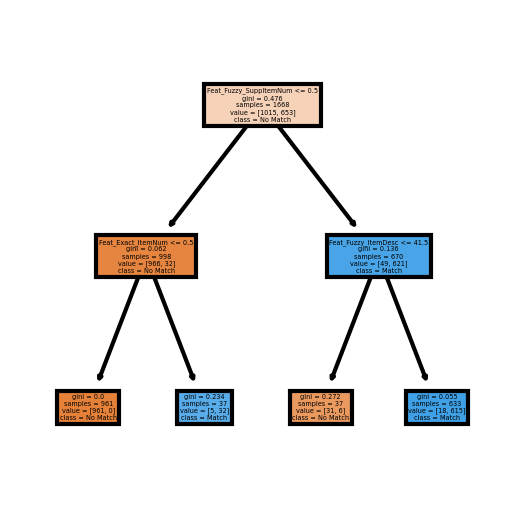

In [11]:
fn = raw_df.filter(regex='^Feat', axis="columns").columns
cn = ['No Match','Match']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(tree_clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
# fig.savefig('imagename.png')

In [12]:
## Verify a model was created
tree_clf.predict(X[0:4])

array([0, 0, 1, 0])

In [13]:
## Verify a model was created
tree_clf.predict_proba(X[0:4])

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.02843602, 0.97156398],
       [1.        , 0.        ]])

## Fine-tune Model (e.g. Grid Search)

In [25]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Grid Search

In [48]:
gs_param_grid = [{
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(1, X.shape[1] + 1)),
    'max_leaf_nodes': [None] + list(range(1, 111, 10)),
    'min_samples_split': [2, 3, 4, 5]
}]

In [49]:
gs_tree_clf = DecisionTreeClassifier(random_state=42)

In [50]:
grid_search = GridSearchCV(gs_tree_clf, gs_param_grid, cv=5, scoring='f1', return_train_score=True)

In [51]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [1, 2, 3, 4, 5, 6],
                          'max_leaf_nodes': [None, 1, 11, 21, 31, 41, 51, 61,
                                             71, 81, 91, 101],
                          'min_samples_split': [2, 3, 4, 5],
                          'splitter': ['best', 'random']}],
             return_train_score=True, scoring='f1')

In [52]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_leaf_nodes': None,
 'min_samples_split': 2,
 'splitter': 'best'}

In [53]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [54]:
gs_bst_sgd_clf = grid_search.best_estimator_

Randomized Search

In [61]:
rs_param_grid = [{
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(1, X.shape[1] + 1)),
    'max_leaf_nodes': [None] + list(range(1, 111, 10)),
    'min_samples_split': [2, 3, 4, 5]
}]

In [62]:
rs_tree_clf = DecisionTreeClassifier(random_state=42)

In [63]:
rand_search = RandomizedSearchCV(rs_tree_clf, rs_param_grid, n_iter=10000, cv=5, scoring='f1', return_train_score=True)

In [64]:
rand_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=10000,
                   param_distributions=[{'criterion': ['gini', 'entropy',
                                                       'log_loss'],
                                         'max_depth': [1, 2, 3, 4, 5, 6],
                                         'max_leaf_nodes': [None, 1, 11, 21, 31,
                                                            41, 51, 61, 71, 81,
                                                            91, 101],
                                         'min_samples_split': [2, 3, 4, 5],
                                         'splitter': ['best', 'random']}],
                   return_train_score=True, scoring='f1')

In [65]:
rand_search.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'max_leaf_nodes': None,
 'max_depth': 5,
 'criterion': 'entropy'}

In [67]:
rs_bst_tree_clf = rand_search.best_estimator_

## Save Model to Modeling Environment

In [68]:
joblib.dump(rs_bst_tree_clf, oput_dir + mdl_oput_file_name)

['C:\\Users\\kehinde.salau\\Cardinal Health\\Enterprise Data Remediation - Documents\\General\\01_Projects\\23_Kinaxis\\Data\\Output\\ML\\L401_mdl_2022-08-01.pkl']